In [107]:
import numpy as np
import pandas as pd
# Reading DATA
df = pd.read_csv('aqardata_2.csv')

In [112]:
# Check the number of missing values
df.isna().sum()

mainlocation      0
sublocation     675
neighborhood      0
frontage          0
purpose         347
streetwidth       3
size              0
Pricepm           0
dtype: int64

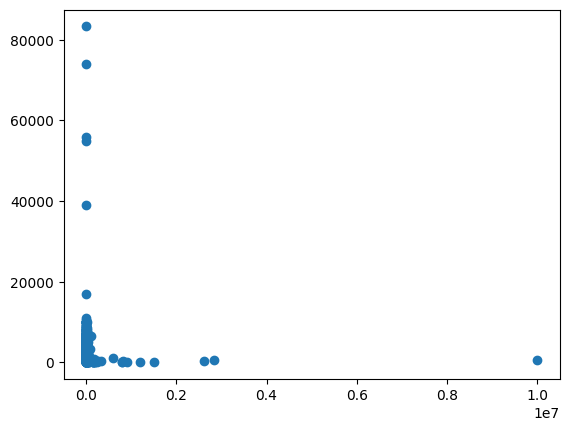

In [113]:
# Draw some features
import matplotlib.pyplot as plt
plt.scatter(df['size'],df['Pricepm'])


In [115]:
df[df['size'] > 15000]

,mainlocation,sublocation,neighborhood,frontage,purpose,streetwidth,size,Pricepm
8,الجموم,NaN,حي النسيم,غرب,NaN,60.0,153500,195
37,الرياض,شمال الرياض,حي بنبان,4 شوارع,سكني أو تجاري,100.0,2610000,350
64,المدينة المنورة,NaN,حي السكب,شمال,سكني أو تجاري,30.0,244137,280
72,الخبر,NaN,حي الروابي,جنوب شرقي,تجاري,60.0,45000,2200
90,الرياض,شمال الرياض,حي الملقا,4 شوارع,تجاري,36.0,21563,3000
...,...,...,...,...,...,...,...,...
2774,الرياض,شمال الرياض,حي الملقا,4 شوارع,NaN,20.0,19857,3900
2805,المذنب,NaN,حي ام عشيرة,شمال غربي,سكني أو تجاري,60.0,912062,2
2880,جدة,شمال جدة,حي ابحر الجنوبية,4 شوارع,سكني أو تجاري,40.0,20000,8500
2943,جدة,شمال جدة,حي النزهة,3 شوارع,تجاري,60.0,36000,2777


In [117]:
# Delete records that have size > 10000 .. and records that have Price > 8000
indexSize = df[ df['size'] > 10000].index
indexPrice = df[ df['Pricepm'] > 8000].index
df.drop(indexSize,inplace=True)
df.drop(indexPrice,inplace=True)



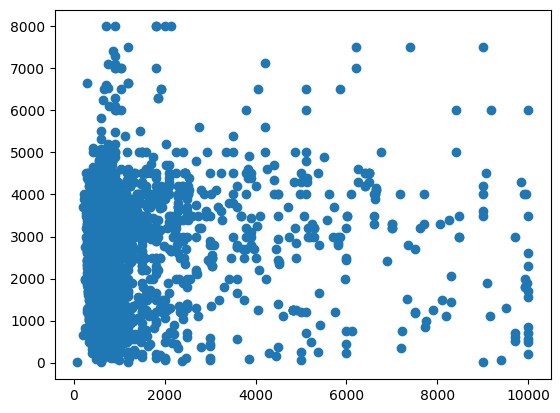

In [118]:
# Draw some features
plt.scatter(df['size'],df['Pricepm'])


In [119]:
# Dropping sublocation column
df.drop(['sublocation'],axis=1, inplace= True)


In [121]:
# Null values now
df.isna().sum()

mainlocation      0
neighborhood      0
frontage          0
purpose         328
streetwidth       3
size              0
Pricepm           0
dtype: int64

In [123]:
df[(df["purpose"].isnull()) & (df["streetwidth"] > 50)]

,mainlocation,neighborhood,frontage,purpose,streetwidth,size,Pricepm
17,الرياض,حي السلي,شمال,NaN,60.0,1800,1666
33,الرياض,حي السلي,شمال,NaN,60.0,3600,1660
615,الخبر,حي الراكة الجنوبية,غرب,NaN,60.0,2750,3200
776,المدينة المنورة,حي الدفاع,جنوب,NaN,60.0,3463,2500
1065,الرياض,حي الملقا,شمال غربي,NaN,60.0,5000,4500
1290,المدينة المنورة,حي الزهرة,شمال شرقي,NaN,65.0,608,1315
1508,الرياض,حي الرمال,4 شوارع,NaN,60.0,9163,1100
2028,الرياض,حي الرمال,4 شوارع,NaN,60.0,4831,1250
2030,الرياض,حي العقيق,جنوب,NaN,60.0,1800,8000
2183,الدمام,حي الخالدية الشمالية,جنوب شرقي,NaN,60.0,7500,2700


In [124]:
# Copying data
df1 = df.copy()

In [125]:
# Dropping purpose column
df1.drop(['purpose'],axis=1, inplace= True)

In [61]:
# Null values now
df1.isna().sum()

mainlocation    0
neighborhood    0
frontage        0
streetwidth     3
size            0
Pricepm         0
dtype: int64

In [127]:
# Dropping null rows (3)
df1.dropna(inplace=True)
df1.isna().sum()

mainlocation    0
neighborhood    0
frontage        0
streetwidth     0
size            0
Pricepm         0
dtype: int64

In [128]:
# Data shape
df1.shape

(2801, 6)

In [129]:
# One Hot Encoding by pandas
oh = pd.get_dummies(df1,columns=["mainlocation","neighborhood","frontage"],prefix=["mainlocation","neighborhood","frontage"])
oh.head()

# Transfer the price column to the last
oh = oh.reindex(columns = [col for col in oh.columns if col != 'Pricepm'] + ['Pricepm'])
oh

,streetwidth,size,mainlocation_ابها,mainlocation_ابو عريش,mainlocation_احد رفيده,mainlocation_الخبر,mainlocation_الخرج,mainlocation_الدرعية,mainlocation_الدلم,mainlocation_الدمام,...,frontage_4 شوارع,frontage_جنوب,frontage_جنوب شرقي,frontage_جنوب غربي,frontage_شرق,frontage_شمال,frontage_شمال شرقي,frontage_شمال غربي,frontage_غرب,Pricepm
0,20.0,727,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1800
1,15.0,450,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,950
2,100.0,1450,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3500
3,15.0,440,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2700
4,40.0,784,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,40.0,1600,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1630
2946,20.0,354,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1200
2948,15.0,934,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,550
2949,15.0,832,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2900


In [130]:
# Features
X = oh.iloc[:, :-1].values
# Target
y = oh.iloc[:,-1].values

In [131]:
# 5-fold cross-validation methodology
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
clf = Lasso()
kfold = KFold(n_splits=5, shuffle=True, random_state=22)
mae_scores = []
rmse_scores = []
r2_scores = []


for train_index, test_index in kfold.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  
  mae = mean_absolute_error(y_test, y_pred)
  mae_scores.append(mae)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  rmse_scores.append(rmse)
  r2 = r2_score(y_test, y_pred)
  r2_scores.append(r2)


In [136]:
print("Mean MAE:", np.mean(mae_scores))
print("Mean RMSE:", np.mean(rmse_scores))
print("Mean R2:", np.mean(r2_scores))

Mean MAE: 432.2176844817333
Mean RMSE: 636.061439280591
Mean R2: 0.7935072254670508
